<a href="https://colab.research.google.com/github/Ge0f3/tensorflow_certification/blob/main/TF_Celcuis_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 
print(tf.__version__)

2.4.1


#Setting up Test data

Supervised learning is about fiquering out algorithm based on the given input and expected output

We are going to have some. We are going to have two list Celcuis which is the input to the neural netowkr and Fahrenheit which is the label or the ouput on which the neural network is going to be trained on.

In [ ]:
celcuis_g = np.array( [-40,-10,0,8,15,22,38],dtype=float)
fahrenheit_g = np.array([celcuis*1.8+32 for celcuis in celcuis_g],dtype=float)



for i,celcuis in enumerate(celcuis_g):
  print("{} degree celcuis == {} degree fahrenheit".format(celcuis,fahrenheit_g[i]))

-40.0 degree celcuis == -40.0 degree fahrenheit
-10.0 degree celcuis == 14.0 degree fahrenheit
0.0 degree celcuis == 32.0 degree fahrenheit
8.0 degree celcuis == 46.4 degree fahrenheit
15.0 degree celcuis == 59.0 degree fahrenheit
22.0 degree celcuis == 71.6 degree fahrenheit
38.0 degree celcuis == 100.4 degree fahrenheit


In [ ]:
print(celcuis_g)
print(fahrenheit_g)

[-40. -10.   0.   8.  15.  22.  38.]
[-40.   14.   32.   46.4  59.   71.6 100.4]


In [ ]:

print(type(fahrenheit_g))
print(celcuis_g[[0]].shape)
print(celcuis_g[[0]])

<class 'numpy.ndarray'>
(1,)
[-40.]


#Build a layer 

To build a layer we need two things 

1.   input_shape=[1] This specifies that the input to this layer is a single value.This is,Ths shape is one dimensional array with one member.Since this is the first layer that input shae is the input shape of the entire model.The single value is a floating point number, representing degree celcuis
2.   units = 1 This specifies the number of neurons in the layer.The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem.Since this is the final layer, it is also the size of the model's ouput - a single float value represnting degress Fahrenheit.



In [ ]:
input_layer = tf.keras.layers.Dense(units=1,input_shape=celcuis_g[[0]].shape)

#Assemble Layers into the model

Once the layers are defined , they need to be assembled into a model. The Sequential model definiton takes a list of layers as argument, Specifying the calculation order from the input to the ouput.

This model has just a single layer, input_layer

In [ ]:
model = tf.keras.Sequential([input_layer])

# another common way of defining model instead of having the layers defined before head and then adding them to layers

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1,input_shape=celcuis_g[[0]].shape)
# ]
# )

#Compile the model, with loss and optimizer functions

Before Training, the model has to be compiled. When compiled from training, the model is give:


*   **Loss Function**  - A way of measuing how far off predictions are from the desired outcome.
*   ** Optimizer Function ** - A way  of adjusting Internal Values in order to reduce the loss



In [ ]:
model.compile(loss = 'mean_squared_error', optimizer= tf.keras.optimizers.Adam(0.1))

#Train the model 

Train the model by calling the fit method model.fit(input,label,epochs=value)

In [ ]:
history = model.fit(celcuis_g,fahrenheit_g,epochs=1000,verbose=False)
print("The Training is complete !!")


The Training is complete !!


##Make prediction 

Make prediction by usging the .predict([value]) method

In [ ]:
print(model.predict([1]))

[[33.7412]]


#Display Training Statistics

The fit methods returns a history object.we can use the object to plot how the loss of our model goes through each training epoch

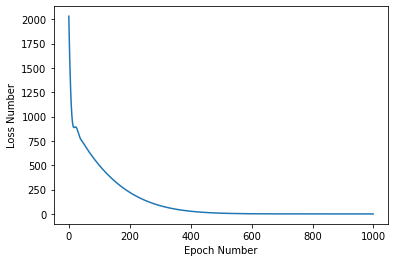

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Number')
plt.plot(history.history['loss'])
plt.show()

#look at the layer weights

Lets print the internal weight and bias of the dense layer

In [ ]:
print("The weight and bias of the dense layer-{}".format(input_layer.get_weights()))

The weight and bias of the dense layer-[array([[1.8005158]], dtype=float32), array([31.940685], dtype=float32)]


### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celcuis_g, fahrenheit_g, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[212.00002]]
Model predicts that 100 degrees Celsius is: [[212.00002]] degrees Fahrenheit
These are the l0 variables: [array([[-0.697846  , -0.28363377,  0.21750337, -0.5712092 ]],
      dtype=float32), array([-3.802175 ,  2.2574089, -1.6951525, -3.8356903], dtype=float32)]
These are the l1 variables: [array([[-0.19191825, -0.21643296, -0.37781113,  1.5231633 ],
       [-0.66515845,  1.3125509 ,  1.1728133 , -0.3115758 ],
       [ 0.01461512, -0.30279037, -0.19746713,  0.4179262 ],
       [-0.46528697, -0.5006745 , -0.16585205,  1.4949415 ]],
      dtype=float32), array([ 3.0817096,  3.744058 ,  3.4922113, -3.403477 ], dtype=float32)]
These are the l2 variables: [array([[ 0.6965012 ],
       [ 0.8222391 ],
       [ 0.51259094],
       [-0.8044076 ]], dtype=float32), array([3.4470773], dtype=float32)]


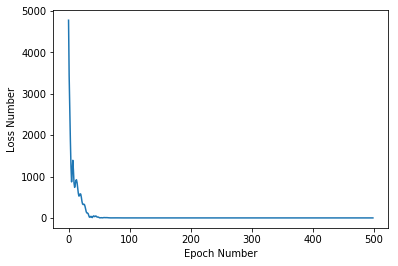

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Number')
plt.plot(history.history['loss'])
plt.show()